In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go

In [2]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbying.htm
columns_lob_lobbying = ['uniqid', 'registrant_raw', 'registrant', 'isfirm', 
                     'client_raw', 'client', 'ultorg', 'amount', 'cid', 'catcode'
                     'source', 'self', 'includensfs', 'use', 'ind', 'year',
                     'type', 'typelong', 'affiliate']

columns_lob_lobbying = dict(enumerate(columns_lob_lobbying))

df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_lobbying = df_lobbying.rename(columns=columns_lob_lobbying)
df_lobbying = df_lobbying.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

/var/folders/5c/qtn4glhd0t7819wv3q972_dh0000gn/T/ipykernel_35251/3327076248.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [3]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_indus.htm
columns_lob_indus = ['client', 'sub', 'total', 'year', 'catcode']
columns_lob_indus = dict(enumerate(columns_lob_indus))

df_indus = pd.read_csv('../../data/open_secrets/Lobby/lob_indus.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_indus = df_indus.rename(columns=columns_lob_indus)
df_indus = df_indus.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [4]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_agency.htm
columns_lob_agency = ['uniqid', 'agencyid', 'agency']
columns_lob_agency = dict(enumerate(columns_lob_agency))

df_agency = pd.read_csv('../../data/open_secrets/Lobby/lob_agency.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_agency = df_agency.rename(columns=columns_lob_agency)
df_agency = df_agency.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [5]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_issues.htm
columns_lob_issue = ['si_id', 'uniqid', 'issueid', 'issue', 'specificissue', 5, 6, 7, 8, 9, 10, 'year']
columns_lob_issue = dict(enumerate(columns_lob_issue))

df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_issue = df_issue.rename(columns=columns_lob_issue)
df_issue = df_issue.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

/var/folders/5c/qtn4glhd0t7819wv3q972_dh0000gn/T/ipykernel_35251/101186058.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [6]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbyists.htm
columns_lob_lobbyist = ['uniqid', 'lobbyist_lastname_std', 'lobbyist_firstname_std', 'lobbyist_lastname_raw', 
                     'lobbyist_firstname_raw', 'lobbyist_id', 'year', 'officialposition', 'cid', 'formercongmem']

columns_lob_lobbyist = dict(enumerate(columns_lob_lobbyist))

df_lobbyist = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbyist.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_lobbyist = df_lobbyist.rename(columns=columns_lob_lobbyist)
df_lobbyist = df_lobbyist.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [7]:
defense_code = "D3000"
year = '2020'
defense = df_indus[(df_indus['catcode'] == defense_code) & (df_indus['year'] == year)]
defense.head()

,client,sub,total,year,catcode
491,Leonardo SpA,Selex Galileo Inc,10000,2020,D3000
1407,North Star Scientific,North Star Scientific,80000,2020,D3000
10852,Anduril Industries,Anduril Industries,550000,2020,D3000
12635,Cerberus Capital Management,Sparton Corp,120000,2020,D3000
19797,Management Services Group,Global Technical Systems,120000,2020,D3000


In [8]:
#match clients to master lobbying table

clients = defense["client"].unique()
#test set
clients = clients[:3]

#match on parent org
def_lobbying = df_lobbying[df_lobbying['ultorg'].isin(clients)]
def_lobbying.head()

print("Not found in lobbying table: ", set(clients) - set(def_lobbying["ultorg"].unique()))
print("Found in lobbying table: ", set(clients).intersection(set(def_lobbying["ultorg"].unique())))

Not found in lobbying table:  set()
Found in lobbying table:  {'North Star Scientific', 'Anduril Industries', 'Leonardo SpA'}


In [9]:
#match on lobbyist - note that amount is not unique
def_lobbyists_complete = df_lobbyist.join(def_lobbying.set_index('uniqid'), on='uniqid', how='inner', rsuffix='_lobbying')
def_lobbyists_complete[['uniqid', 'registrant', 'client', 'lobbyist_lastname_std', 'lobbyist_id', 'officialposition', 'cid', 'formercongmem', 'ultorg', 'amount']].head()
#def_lobbyists_complete.columns

,uniqid,registrant,client,lobbyist_lastname_std,lobbyist_id,officialposition,cid,formercongmem,ultorg,amount
41585,B26968CD-D3C9-4186-8D0A-C715A1A1626B,Invariant LLC,Anduril Industries,HOFFMAN,Y0000010142L,,,n,Anduril Industries,20000.0
41586,B26968CD-D3C9-4186-8D0A-C715A1A1626B,Invariant LLC,Anduril Industries,JOYCE,Y0000052936L,,,n,Anduril Industries,20000.0
41587,B26968CD-D3C9-4186-8D0A-C715A1A1626B,Invariant LLC,Anduril Industries,KLEIN,Y0000043997L,,,n,Anduril Industries,20000.0
41588,B26968CD-D3C9-4186-8D0A-C715A1A1626B,Invariant LLC,Anduril Industries,PODESTA,Y0000046505M,,,n,Anduril Industries,20000.0
103709,CF521A9F-C608-45E5-9A30-2C87C8B1FEE0,Inc.,NORTH STAR SCIENTIFIC CORPORATION,COLLINS,Y0000041948L,,,n,North Star Scientific,North Star Scientific


In [10]:
reg_org = def_lobbyists_complete[["registrant", "ultorg", "amount"]]

reg_org['amount'] = pd.to_numeric(reg_org['amount'], errors='coerce')
reg_org = reg_org.dropna(subset=['amount'])
reg_org = reg_org[reg_org['amount'] > 0]

reg_org.head()

/var/folders/5c/qtn4glhd0t7819wv3q972_dh0000gn/T/ipykernel_35251/2271475551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_org['amount'] = pd.to_numeric(reg_org['amount'], errors='coerce')


,registrant,ultorg,amount
41585,Invariant LLC,Anduril Industries,20000.0
41586,Invariant LLC,Anduril Industries,20000.0
41587,Invariant LLC,Anduril Industries,20000.0
41588,Invariant LLC,Anduril Industries,20000.0
125098,Prenda Group,Leonardo SpA,20000.0


In [11]:
lobbyist_reg = def_lobbyists_complete[["registrant", "lobbyist_lastname_std", "lobbyist_id", "formercongmem", "ultorg"]].drop_duplicates()
lobbyist_reg.head()

,registrant,lobbyist_lastname_std,lobbyist_id,formercongmem,ultorg
41585,Invariant LLC,HOFFMAN,Y0000010142L,n,Anduril Industries
41586,Invariant LLC,JOYCE,Y0000052936L,n,Anduril Industries
41587,Invariant LLC,KLEIN,Y0000043997L,n,Anduril Industries
41588,Invariant LLC,PODESTA,Y0000046505M,n,Anduril Industries
103709,Inc.,COLLINS,Y0000041948L,n,North Star Scientific


In [12]:
#join on agency - note that agencies are not unique to one lobbyist
org_agency = def_lobbyists_complete[["uniqid", 'registrant', 'client', "ultorg"]].drop_duplicates().join(df_agency.set_index('uniqid'), on='uniqid', how='inner', rsuffix= "_agency")[['agencyid', 'agency', 'registrant', 'client', 'ultorg']]
#def_lobbyists_complete = def_lobbyists_complete.join(df_agency.set_index('uniqid'), on='uniqid', how='inner', rsuffix= "_agency")[['agencyid', 'agency',  'ultorg', 'amount']]
org_agency.head()

,agencyid,agency,registrant,client,ultorg
41585,201,Dept of Homeland Security,Invariant LLC,Anduril Industries,Anduril Industries
41585,009,Executive Office of the President,Invariant LLC,Anduril Industries,Anduril Industries
41585,001,US Senate,Invariant LLC,Anduril Industries,Anduril Industries
41585,002,US House of Representatives,Invariant LLC,Anduril Industries,Anduril Industries
103709,001,US Senate,Inc.,NORTH STAR SCIENTIFIC CORPORATION,North Star Scientific


In [13]:
def_lobbyists_complete = def_lobbyists_complete.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
def_lobbyists_complete.head()

,uniqid,lobbyist_lastname_std,lobbyist_firstname_std,lobbyist_lastname_raw,lobbyist_firstname_raw,lobbyist_id,year,officialposition,cid,formercongmem,...,cid_lobbying,catcodesource,self,includensfs,use,ind,year_lobbying,type,typelong,affiliate
41585,B26968CD-D3C9-4186-8D0A-C715A1A1626B,HOFFMAN,ROBERT,Hoffman,Robert,Y0000010142L,2017,,,n,...,D3000,WAB18,n,,y,y,2017,q3,THIRD QUARTER REPORT,
41586,B26968CD-D3C9-4186-8D0A-C715A1A1626B,JOYCE,SEAN,Joyce,Sean,Y0000052936L,2017,,,n,...,D3000,WAB18,n,,y,y,2017,q3,THIRD QUARTER REPORT,
41587,B26968CD-D3C9-4186-8D0A-C715A1A1626B,KLEIN,BENJAMIN,Klein,Ben,Y0000043997L,2017,,,n,...,D3000,WAB18,n,,y,y,2017,q3,THIRD QUARTER REPORT,
41588,B26968CD-D3C9-4186-8D0A-C715A1A1626B,PODESTA,HEATHER,Podesta,Heather,Y0000046505M,2017,,,n,...,D3000,WAB18,n,,y,y,2017,q3,THIRD QUARTER REPORT,
103709,CF521A9F-C608-45E5-9A30-2C87C8B1FEE0,COLLINS,RICHARD L,Collins,Richard L,Y0000041948L,2010,,,n,...,0.0,D3000,WebDW,n,,y,y,2010,q4a,FOURTH QUARTER AMENDMENT


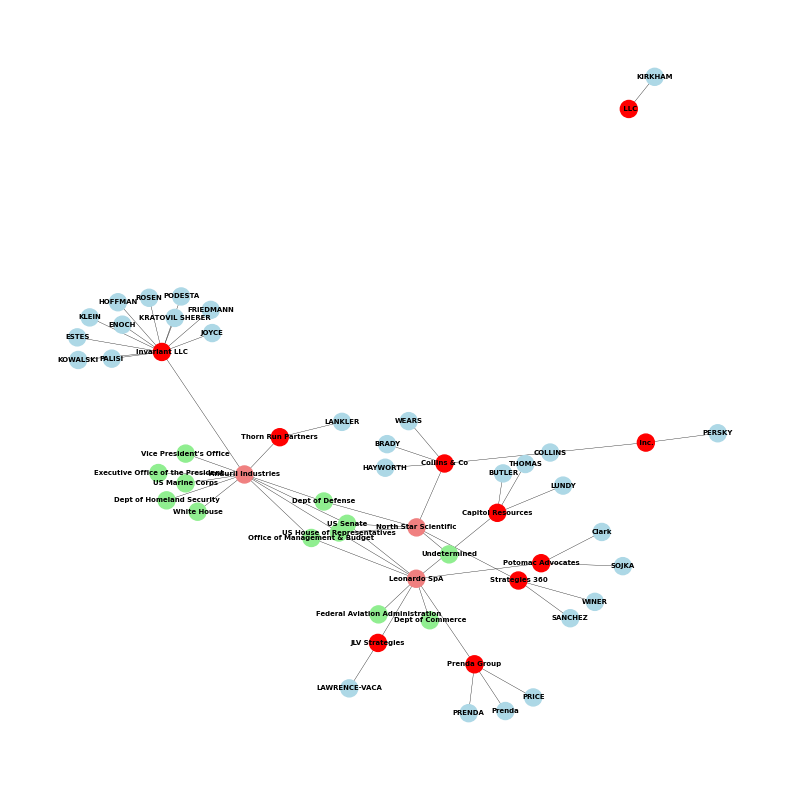

In [22]:
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()
fig = go.Figure()

lobbyist_nodes = lobbyist_reg[["lobbyist_id", "lobbyist_lastname_std"]].drop_duplicates()
reg_nodes = reg_org[["ultorg"]].drop_duplicates()
agency_nodes = org_agency[["agency"]].drop_duplicates()
"""
for _, row in lobbyist_nodes.iterrows():
    lobbyist_id = row['lobbyist_id']
    lobbyist_name = row['lobbyist_lastname_std']
    G.add_node(lobbyist_id, type='lobbyist', label=lobbyist_name)

for _, row in reg_nodes.iterrows():
    ultorg = row['ultorg']
    G.add_node(ultorg, type='ultorg', label=ultorg)

for _, row in agency_nodes.iterrows():
    agency = row['agency']
    G.add_node(agency, type='agency', label=agency)
"""

for _, row in lobbyist_reg.iterrows():
    lobbyist_id = row['lobbyist_id']
    reg = row['registrant']
    if(G.has_node(lobbyist_id) == False):
        G.add_node(lobbyist_id, type='lobbyist', label=row['lobbyist_lastname_std'])
    if(G.has_node(reg) == False):
        G.add_node(reg, type='registrant', label=reg)
    G.add_edge(lobbyist_id, reg)

for _, row in reg_org.iterrows():
    ultorg = row['ultorg']
    reg = row['registrant']
    if(G.has_node(ultorg) == False):
        G.add_node(ultorg, type='ultorg', label=ultorg)
    if(G.has_node(reg) == False):
        G.add_node(reg, type='registrant', label=reg)
    G.add_edge(ultorg, reg)

for _, row in org_agency.iterrows():
    agency = row['agency']
    ultorg = row['ultorg']
    if(G.has_node(agency) == False):
        G.add_node(agency, type='agency', label=agency)
    if(G.has_node(ultorg) == False):
        G.add_node(ultorg, type='ultorg', label=ultorg)
    G.add_edge(agency, ultorg)

# Define node colors based on node type
node_colors = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'lobbyist':
        node_colors.append('lightblue')
    elif node[1]['type'] == 'agency':
        node_colors.append('lightgreen')
    elif node[1]['type'] == 'ultorg':
        node_colors.append('lightcoral')
    elif node[1]['type'] == 'registrant':
        node_colors.append('red')

# Draw the graph
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=150, width=0.25, node_color=node_colors, font_weight='bold', font_size=5, ax=ax)
plt.show()


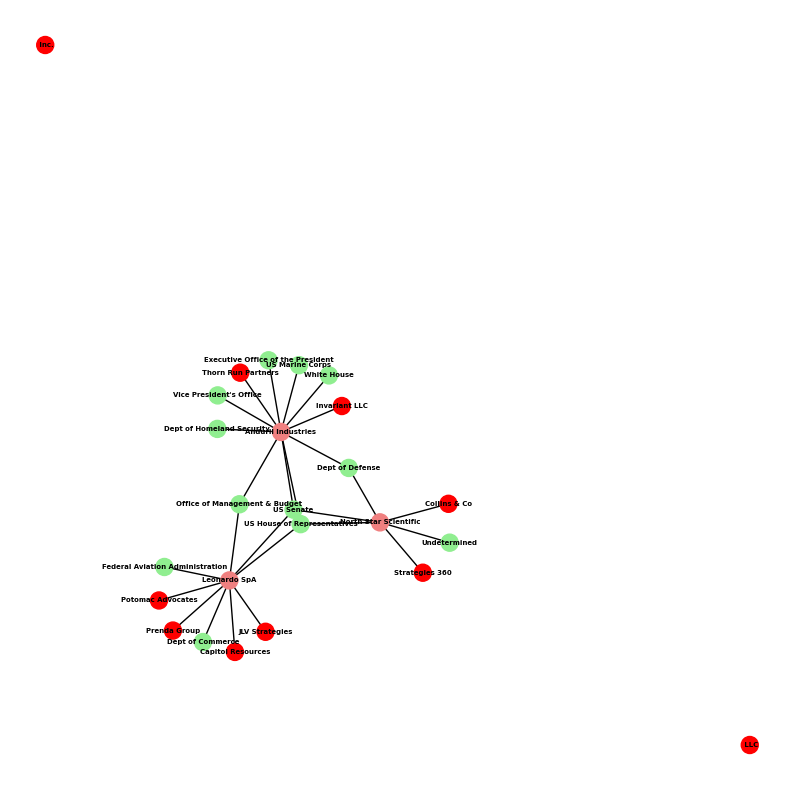

In [23]:
# Remove lobbyist nodes from the graph
lobbyist_ids = lobbyist_nodes['lobbyist_id'].tolist()
G_no_lobbyists = G.copy()
G_no_lobbyists.remove_nodes_from(lobbyist_ids)

# Define node colors for the new graph without lobbyists
node_colors_no_lobbyists = []
for node in G_no_lobbyists.nodes(data=True):
    if node[1]['type'] == 'agency':
        node_colors_no_lobbyists.append('lightgreen')
    elif node[1]['type'] == 'ultorg':
        node_colors_no_lobbyists.append('lightcoral')
    elif node[1]['type'] == 'registrant':
        node_colors_no_lobbyists.append('red')

# Draw the new graph without lobbyists
pos_no_lobbyists = nx.spring_layout(G_no_lobbyists)
fig_no_lobbyists, ax_no_lobbyists = plt.subplots(figsize=(10, 10))
nx.draw(G_no_lobbyists, pos_no_lobbyists, with_labels=True, labels=nx.get_node_attributes(G_no_lobbyists, 'label'), node_size=150, node_color=node_colors_no_lobbyists, font_size=5, font_weight='bold', ax=ax_no_lobbyists)
plt.show()